In [1]:
#importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split

Week 01:

Objective:- To set up the project environment and gather the necessary data for model development.


In [2]:
# Loading the given dataset as 'credit_df'
credit_df = pd.read_csv("C:/Users/jeffy/Downloads/credit.csv")

In [3]:
credit_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


# Data Preprocessing

In [4]:
credit_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
# Get the shape of the 'credit_df'
df_shape = credit_df.shape

# Print the number of features and observations
print(f"Number of Features:{df_shape[1]-1}")
print(f"Number of Observations:{df_shape[0]}")

Number of Features:27
Number of Observations:100000


In [6]:
# Displaying information about the 'credit_df'
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
# Checking missing value
if not credit_df.isna().sum().any():
    print("'credit_df' does not have any null values.")

'credit_df' does not have any null values.


# DUPLICATE VALUES

In [8]:
# Checking duplicate value
if not credit_df.duplicated().any():
    print("'credit_df' does not have any duplicate value.")

'credit_df' does not have any duplicate value.


# OUTLIERS

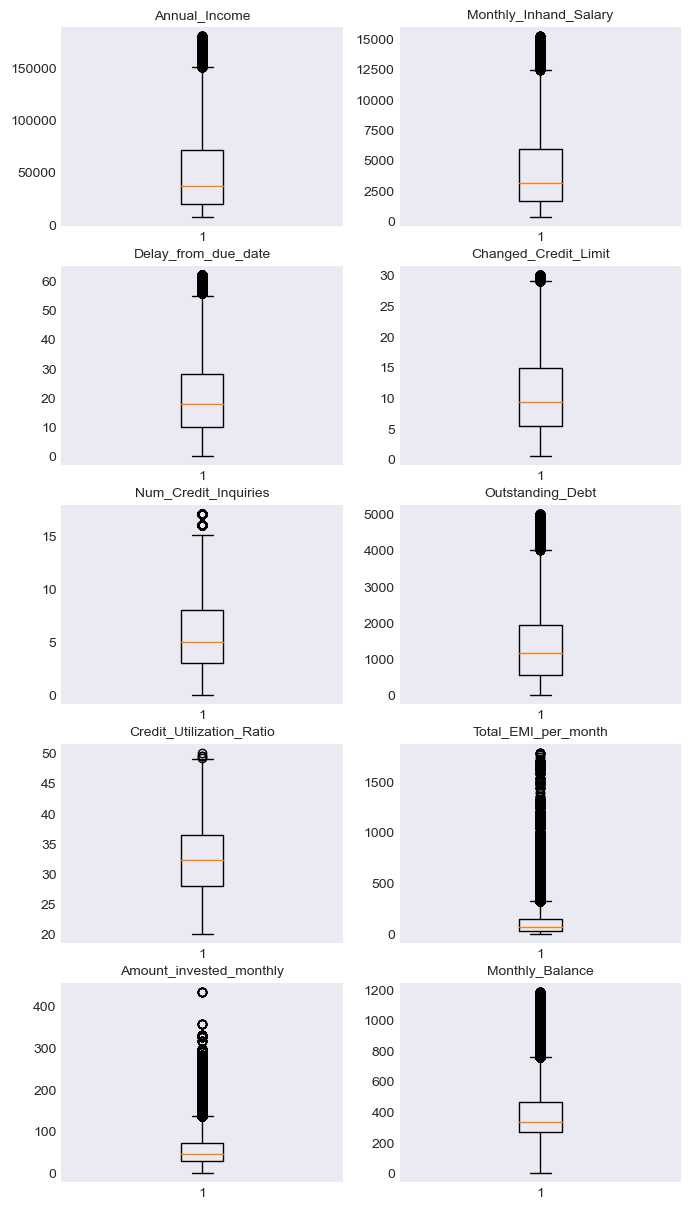

In [9]:
# Define the columns with potential outliers
outlier_columns = ['Annual_Income', 'Monthly_Inhand_Salary',
                   'Delay_from_due_date', 'Changed_Credit_Limit',
                   'Num_Credit_Inquiries', 'Outstanding_Debt',
                   'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                   'Amount_invested_monthly', 'Monthly_Balance',]

# Setting the plot style and figure size
plt.style.use('seaborn-v0_8-dark')
plt.figure(figsize=(8,15))

# Iterate through the outlier columns and create boxplots
for n,i in zip(range(1,11),range(0,10)):
    plt.subplot(5,2,n)
    plt.boxplot(credit_df[outlier_columns[i]])
    plt.title(outlier_columns[i], fontsize=10)

# Display the plot
plt.show()

In [10]:
#function to list out the outlier values
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (upr_bound):
            outliers.append(i)
    return outliers

In [11]:
#outliers with median value
for feature in outlier_columns:
    outliers = detect_outliers_iqr(credit_df[feature])
    impute_value = credit_df[feature].median()
    filter = credit_df[feature] >= np.min(outliers)
    credit_df.loc[filter,feature] = impute_value

In [12]:
credit_df.drop(['ID','Customer_ID','SSN'],axis=1, inplace=True)

# EDA

In [14]:
credit_cal=credit_df.select_dtypes(include='object')
credit_num=credit_df.select_dtypes(include='number')

In [15]:
credit_cal.describe().T

,count,unique,top,freq
Name,100000,10128,Jessicad,48
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28616
Credit_Score,100000,3,Standard,53174


In [16]:
for cat_col in credit_cal:
    print(credit_cal[cat_col].value_counts())
    print('\n-------------')
     

Jessicad              48
Langep                48
Stevex                48
Vaughanl              40
Ronald Groverk        40
                      ..
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Valentina Zan          8
Nicks                  8
Name: Name, Length: 10128, dtype: int64

-------------
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

-------------
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder

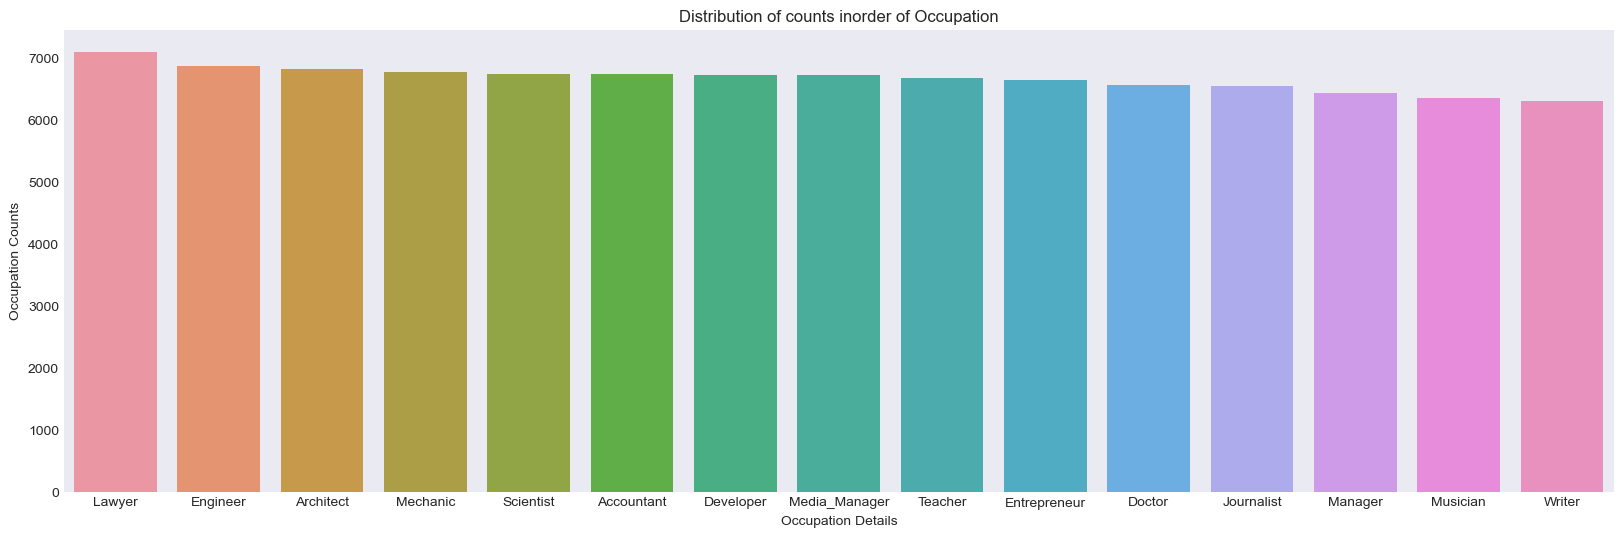

In [17]:
#occupation
plt.figure(figsize=(20,6))
ax=sns.countplot(x='Occupation',data=credit_cal,order=credit_df['Occupation'].value_counts().index)
plt.title('Distribution of counts inorder of Occupation')
plt.xlabel('Occupation Details')
plt.ylabel("Occupation Counts")
plt.show()

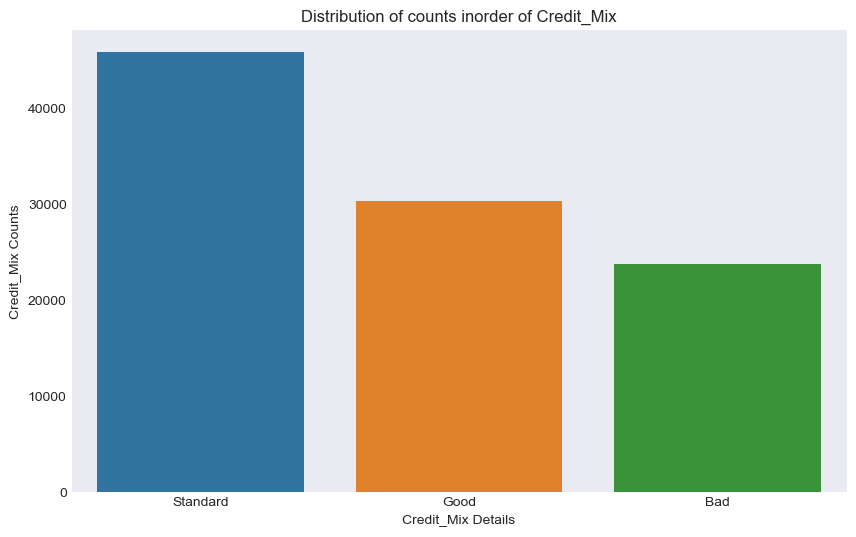

In [18]:
#credit mix
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Credit_Mix',data=credit_cal,order=credit_df['Credit_Mix'].value_counts().index)
plt.title('Distribution of counts inorder of Credit_Mix')
plt.xlabel('Credit_Mix Details')
plt.ylabel("Credit_Mix Counts")
plt.show()

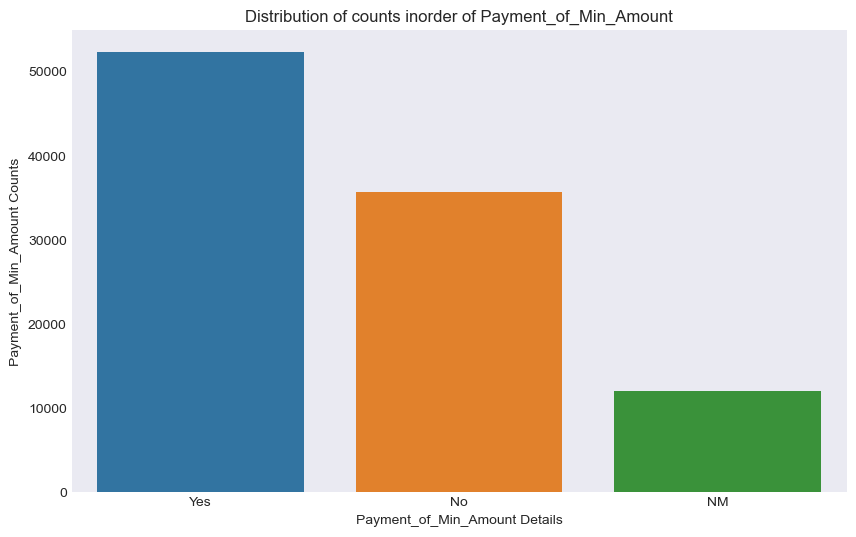

In [19]:
#Payment_of_Min_Amount
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Payment_of_Min_Amount',data=credit_cal,order=credit_df['Payment_of_Min_Amount'].value_counts().index)
plt.title('Distribution of counts inorder of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount Details')
plt.ylabel("Payment_of_Min_Amount Counts")
plt.show()

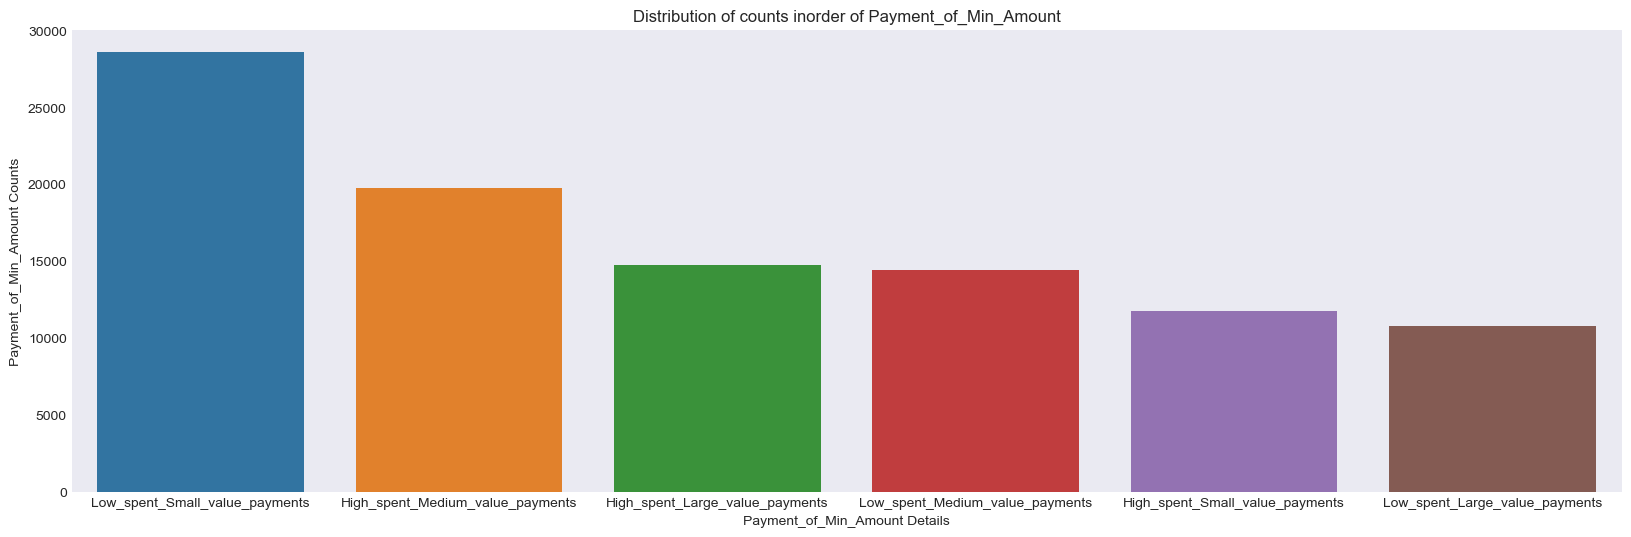

In [20]:
#Payment_Behaviour
plt.figure(figsize=(20,6))
ax=sns.countplot(x='Payment_Behaviour',data=credit_cal,order=credit_df['Payment_Behaviour'].value_counts().index)
plt.title('Distribution of counts inorder of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount Details')
plt.ylabel("Payment_of_Min_Amount Counts")
plt.show()

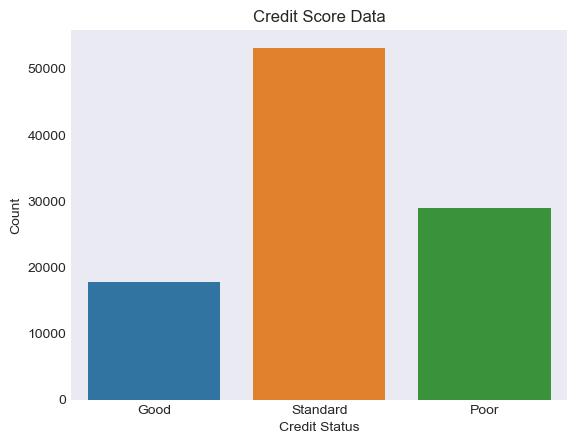

In [21]:
ax = sns.countplot(x = 'Credit_Score',data = credit_df)
plt.title('Credit Score Data')
plt.xlabel('Credit Status')
plt.ylabel('Count')
plt.show()

In [22]:
credit_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,100000.0,4.500000,2.291299e+00,1.000000,2.750000,4.500000,6.250000,8.000000
Age,100000.0,33.316340,1.076481e+01,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,36999.705000,4.872006e-08,36999.705000,36999.705000,36999.705000,36999.705000,36999.705000
Monthly_Inhand_Salary,100000.0,3095.905000,2.850371e-09,3095.905000,3095.905000,3095.905000,3095.905000,3095.905000
Num_Bank_Accounts,100000.0,5.368820,2.593314e+00,0.000000,3.000000,5.000000,7.000000,11.000000
Num_Credit_Card,100000.0,5.533570,2.067098e+00,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330e+00,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356e+00,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,18.000000,0.000000e+00,18.000000,18.000000,18.000000,18.000000,18.000000
Num_of_Delayed_Payment,100000.0,13.313120,6.237166e+00,0.000000,9.000000,14.000000,18.000000,25.000000


In [23]:
corr_format= credit_num.corr()
corr_format

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Month,1.000000e+00,0.016990,NaN,NaN,0.000079,0.000090,6.790115e-18,1.555542e-16,NaN,0.000115,NaN,NaN,NaN,NaN,0.022784,NaN,NaN,NaN
Age,1.698955e-02,1.000000,NaN,NaN,-0.190415,-0.148567,-2.175571e-01,-2.135330e-01,NaN,-0.184264,NaN,NaN,NaN,NaN,0.234618,NaN,NaN,NaN
Annual_Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Bank_Accounts,7.909795e-05,-0.190415,NaN,NaN,1.000000,0.442694,5.843015e-01,4.724831e-01,NaN,0.601842,NaN,NaN,NaN,NaN,-0.485331,NaN,NaN,NaN
Num_Credit_Card,8.973261e-05,-0.148567,NaN,NaN,0.442694,1.000000,4.979115e-01,4.179595e-01,NaN,0.423300,NaN,NaN,NaN,NaN,-0.417205,NaN,NaN,NaN
Interest_Rate,6.790115e-18,-0.217557,NaN,NaN,0.584302,0.497912,1.000000e+00,5.591562e-01,NaN,0.571457,NaN,NaN,NaN,NaN,-0.576230,NaN,NaN,NaN
Num_of_Loan,1.555542e-16,-0.213533,NaN,NaN,0.472483,0.417960,5.591562e-01,1.000000e+00,NaN,0.473919,NaN,NaN,NaN,NaN,-0.605727,NaN,NaN,NaN
Delay_from_due_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_of_Delayed_Payment,1.154567e-04,-0.184264,NaN,NaN,0.601842,0.423300,5.714569e-01,4.739186e-01,NaN,1.000000,NaN,NaN,NaN,NaN,-0.481965,NaN,NaN,NaN


# Heat Map

<Axes: >

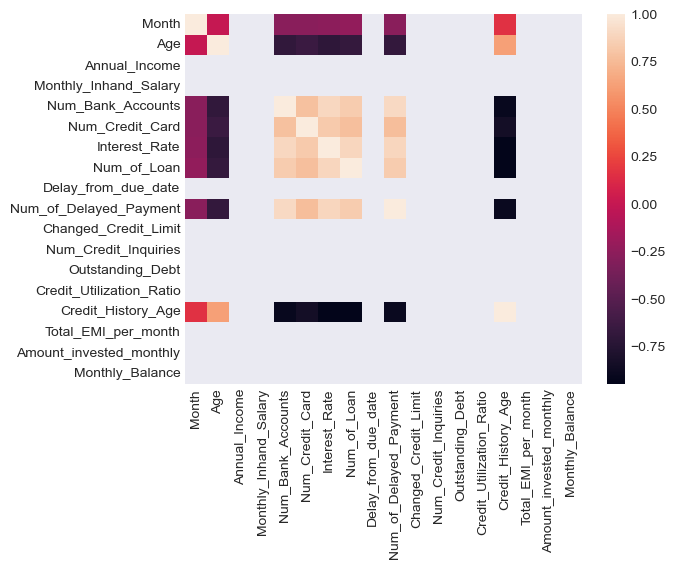

In [24]:
sns.heatmap(corr_format.corr())

In [25]:
numeric_cols= credit_df.select_dtypes(exclude='object').columns
cat_cols= credit_df.select_dtypes(include='object').columns
numeric_cols

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [26]:
cat_cols

Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [28]:
vif_credit_df = credit_df[numeric_cols]
vif_data =pd.DataFrame()
vif_data["Feature"]=vif_credit_df.columns
vif_data["VIF"]=[variance_inflation_factor(vif_credit_df.values,i) for i in range(len(vif_credit_df.columns))]
vif_data.head(17)

C:\Users\jeffy\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,Month,1.001205e+00
1,Age,1.076726e+00
2,Annual_Income,1.725244e-26
3,Monthly_Inhand_Salary,1.122335e-02
4,Num_Bank_Accounts,1.899695e+00
5,Num_Credit_Card,1.452445e+00
6,Interest_Rate,2.142407e+00
7,Num_of_Loan,1.842108e+00
8,Delay_from_due_date,0.000000e+00
9,Num_of_Delayed_Payment,1.851595e+00


# Splitting data

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = credit_df.drop('Credit_Score',axis=1)
y = credit_df['Credit_Score']

# Split the dataset into training and testing sets (e.g., 60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,
                                                   random_state=42, stratify=y)

# Split the traing dataset into training and validating sets (e.g., 50% test, 50% validate)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size=0.5,
                                                   random_state=42, stratify=y_test)